EDA DEL ARCHIVO "ECECTRIC CAR DATA NORM"

Importamos librerias a utilizar

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

Abrimos el archivo que esta en formato parquet una vez que lo realizamos el ETL y vamos a proceder a realizar el EDA

In [45]:
eda_ecdc = pd.read_parquet('D:/escritorio/NYC-TAXIS/NYC_TAXIS-CO2/Data/Normalized/Ecdn_limpio.parquet')
eda_ecdc.head(4)

,Brand,Model,Accel,TopSpeed,Range,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,68040


Vamos a ver la estructura del archivo

In [46]:
print(eda_ecdc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      103 non-null    object
 1   Model      103 non-null    object
 2   Accel      103 non-null    object
 3   TopSpeed   103 non-null    object
 4   Range      103 non-null    object
 5   PriceEuro  103 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 5.0+ KB
None


Vamos a ver que cuantas columnas y filas posee

In [47]:
print(eda_ecdc.shape)

(103, 6)


Tenemos 6 columas con 103 registros realizados, Las columas que poseemos son (Brand/Model/Accel/TopSpeed/Range/PriceEuro)
Brand = "Marca de Vehiculo"
Model = "Modelo"
Accel = "Acelerar"
TopSpeed = "VelMax/Hs"
Range = "Rango"
PriceEuro = "Precio en euros"

Podemos ver que tenemos datos unicos en distintas columas

In [48]:
print(eda_ecdc.nunique())

Brand         33
Model        102
Accel         55
TopSpeed      25
Range         50
PriceEuro     87
dtype: int64


Vamos a revisar si tenemos valores faltantes en las columnas

In [49]:
print(eda_ecdc.isnull().sum())

Brand        0
Model        0
Accel        0
TopSpeed     0
Range        0
PriceEuro    0
dtype: int64


Nos devuleve que todo esta bien, debido a que al momento de hacer el ETL hicimos una limpieza de datos donde habian filas vacias y valores nulos lo cual optamos por eliminar

Voy a convertir columnas numéricas de texto a numérico 'Accel', 'TopSpeed' y 'Range' representan valores numéricos, para poder realizar análisis numéricos en ellas.

In [50]:
eda_ecdc['Accel'] = pd.to_numeric(eda_ecdc['Accel'], errors='coerce')
eda_ecdc['TopSpeed'] = pd.to_numeric(eda_ecdc['TopSpeed'], errors='coerce')
eda_ecdc['Range'] = pd.to_numeric(eda_ecdc['Range'], errors='coerce')

Una vez convertido las columnas numéricas correctamente, podrías calcular estadísticas descriptivas para ellas.

In [51]:
print(eda_ecdc[['Accel', 'TopSpeed', 'Range', 'PriceEuro']].describe())


       Accel  TopSpeed  Range      PriceEuro
count    0.0       0.0    0.0     103.000000
mean     NaN       NaN    NaN   55811.563107
std      NaN       NaN    NaN   34134.665280
min      NaN       NaN    NaN   20129.000000
25%      NaN       NaN    NaN   34429.500000
50%      NaN       NaN    NaN   45000.000000
75%      NaN       NaN    NaN   65000.000000
max      NaN       NaN    NaN  215000.000000


Ya que tienemos una columna de precios, vamos a visualizar la distribución utilizando un histogram

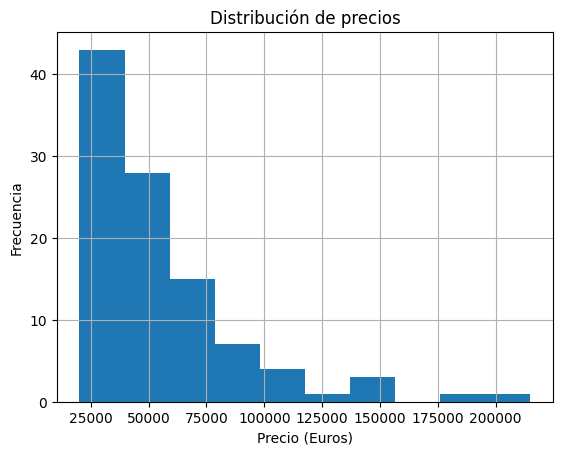

In [52]:
eda_ecdc['PriceEuro'].hist()
plt.xlabel('Precio (Euros)')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')
plt.show()


Podemos ver que la marca TESLA es la que tiene mayor cantidad de modelos únicos

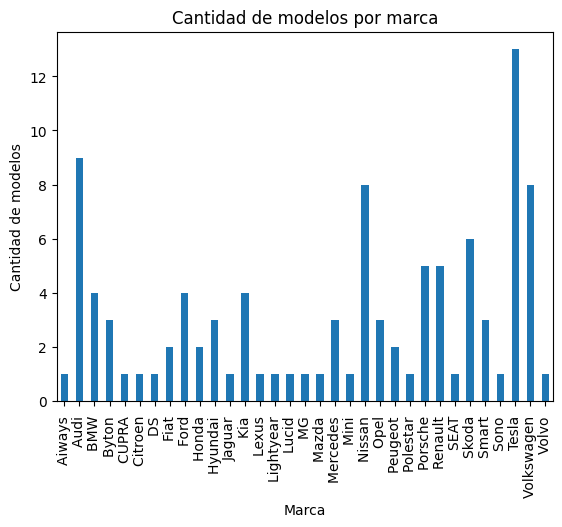

In [53]:
eda_ecdc.groupby('Brand')['Model'].nunique().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Cantidad de modelos')
plt.title('Cantidad de modelos por marca')
plt.show()

Esto nos sive para analizar cuántos modelos únicos tiene cada fabricante. Tienen una variedad más amplia de modelos en comparación con otras. Esto podría ser importante para la segmentación del mercado y la comprensión de las estrategias comerciales de diferentes fabricantes. 

EDA DEL ARCHIVO "LIGHT DUTY VEHICLE"

In [54]:
eda_light = pd.read_parquet('D:/escritorio/NYC-TAXIS/NYC_TAXIS-CO2/Data/Normalized/light_duty_limpio.parquet')
eda_light.head(4)

,Model,Year,Manufacturer,Category,Fuel
0,NSX,2022,Acura,Sedan/Wagon,Hybrid Electric
1,A3,2022,Audi,Sedan/Wagon,Hybrid Electric
2,A3 quattro,2022,Audi,Sedan/Wagon,Hybrid Electric
3,A4 allroad quattro,2022,Audi,Sedan/Wagon,Hybrid Electric


Vamos a revisar nuestros archivo una vez limpio

In [55]:
# Revisamos la composición del mismo
eda_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         3008 non-null   object
 1   Year          3008 non-null   int64 
 2   Manufacturer  3008 non-null   object
 3   Category      3008 non-null   object
 4   Fuel          3008 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.6+ KB


Podemos observar que no tenemos datos nulos, que tenemos 4 columnas de tipo object y una de int

COLUMNAS
- Modes = modelo del auto
- Year = año
- Manufacturer = Marca del auto
- Fuel = Tipo de combustible que lleva el auto

Estadísticas descriptivas


In [56]:
#Estadísticas descriptivas
print(eda_light.describe())

              Year
count  3008.000000
mean   2014.493019
std       6.722191
min    1991.000000
25%    2012.000000
50%    2016.000000
75%    2020.000000
max    2022.000000


Text(0, 0.5, 'Frecuencia')

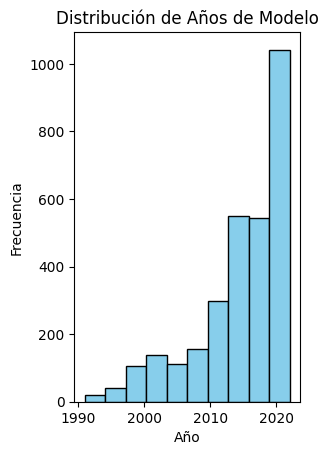

In [57]:
# Histograma de años de modelos
plt.subplot(1, 2, 1)
plt.hist(eda_light["Year"], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Años de Modelo')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

Se observa que en el año 2020 hubo mayor frecienca de modelos de datos

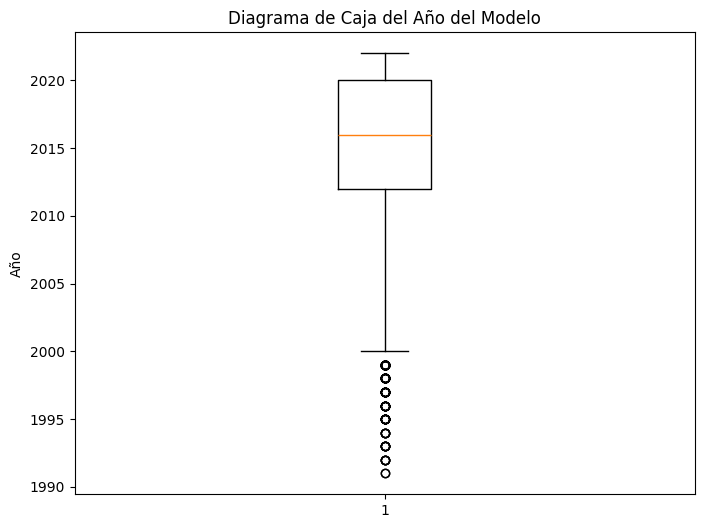

In [58]:
# Diagrama de caja del año del modelo
plt.figure(figsize=(8, 6))
plt.boxplot(eda_light['Year'])
plt.title('Diagrama de Caja del Año del Modelo')
plt.ylabel('Año')
plt.show()

Podemos ver que en los años 2010 en adelante, hasata el 2020 hay una mayor cantidad de modelos de autos. Que en años anteriores, esto quiere decir que las empresas empezaron a lanzar nuevos modelos de coches

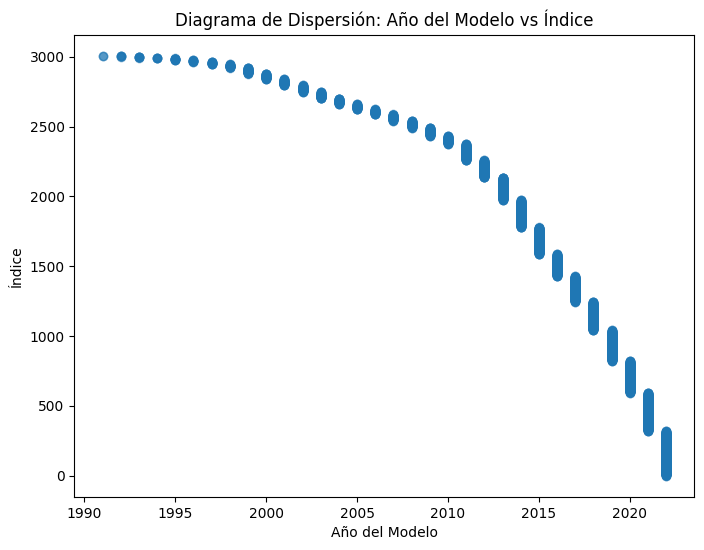

In [59]:
# Diagrama de dispersión entre el año del modelo y el fabricante
plt.figure(figsize=(8, 6))
plt.scatter(eda_light['Year'], eda_light.index, alpha=0.5)
plt.title('Diagrama de Dispersión: Año del Modelo vs Índice')
plt.xlabel('Año del Modelo')
plt.ylabel('Índice')
plt.show()

C:\Users\lautaro\AppData\Local\Temp\ipykernel_12080\3744968759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Year', data=eda_light, palette='muted')


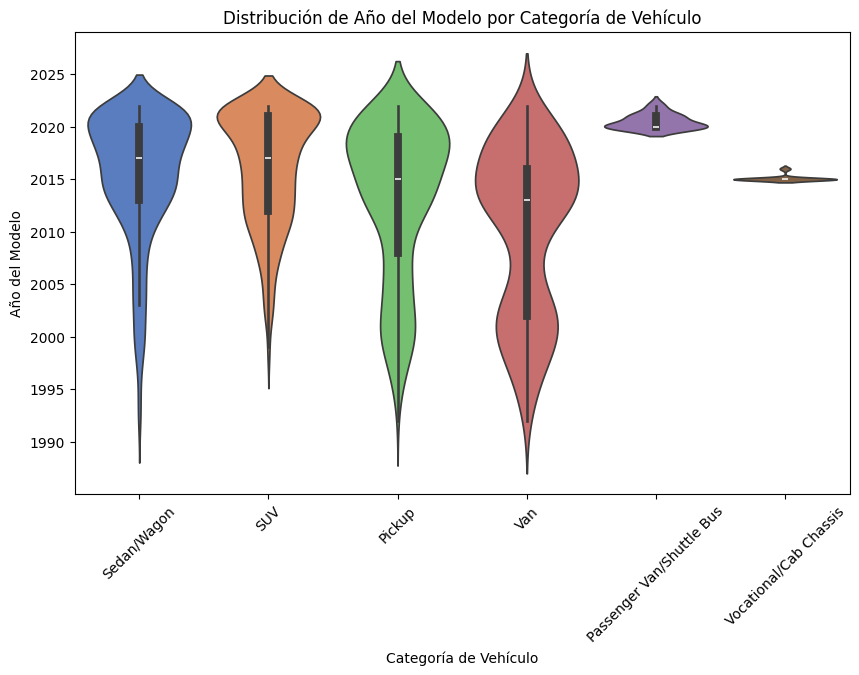

In [60]:
import seaborn as sns

# Gráfico de violín de año del modelo por categoría de vehículo
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Year', data=eda_light, palette='muted')
plt.title('Distribución de Año del Modelo por Categoría de Vehículo')
plt.xlabel('Categoría de Vehículo')
plt.ylabel('Año del Modelo')
plt.xticks(rotation=45)
plt.show()

Se observa que la categoria de autos van son los que mejor rendimiento tuvieron a lo largo de los años, siempre estuvo vigente, en cambio Vocational/cab chassis intento salir al mercado y no fue de buen requerimiento para el rubro de los trasnporte

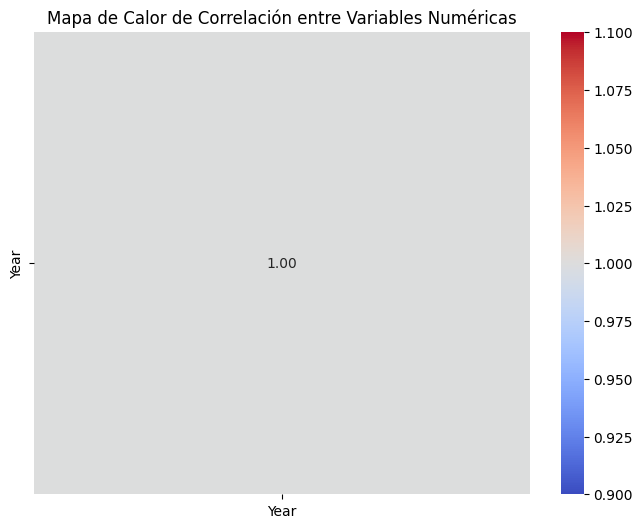

In [61]:
# Eliminar las columnas no numéricas
df_numeric = eda_light.drop(columns=['Model', 'Manufacturer', 'Category', 'Fuel'])

# Mapa de calor de correlación entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

EDA del archivo Vehicle Fuel Economy Data

In [64]:
eda_vfed = pd.read_parquet('D:/escritorio/NYC-TAXIS/NYC_TAXIS-CO2/Data/Normalized/vfed_limpio.parquet')
eda_vfed.head(4)

,Year,Manufacturer,Model,City08,CO2,Tipo de Combustible,Categoria
0,2017,BMW,M6 Coupe,15.0,519.0,Premium Gasoline,Subcompact Cars
1,2017,BMW,X3 sDrive28i,21.0,374.0,Premium Gasoline,Small Sport Utility Vehicle 2WD
2,2016,Infiniti,Q50S Red Sport,20.0,402.0,Premium Gasoline,Midsize Cars
3,2017,MINI,John Cooper Works Convertible,24.0,327.0,Premium Gasoline,Minicompact Cars


Vamos a ver como quedaron los datos luego del proceso de ETL

In [65]:
# Obtener información básica sobre el DataFrame
print(eda_vfed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37736 entries, 0 to 37735
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 37736 non-null  int64  
 1   Manufacturer         37736 non-null  object 
 2   Model                37736 non-null  object 
 3   City08               37736 non-null  float64
 4   CO2                  37736 non-null  float64
 5   Tipo de Combustible  37736 non-null  object 
 6   Categoria            37736 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.0+ MB
None


observamos que tenemos 4 tipos de datos como object 2 columnas con datos float y una con datos int

Columas
- Year = año
- Manufacturer = Marca de coche
- Model = Modelo del auto
- City08 = 
- CO2 = CO2 ocacionado por el vehiculo
- Tipo de combustible = Tipo de combustible que requieren los autos
- Categoria = Categoria del auto

Resumen estadístico de variables numéricas

In [66]:
# Resumen estadístico de variables numéricas
print(eda_vfed.describe())

               Year        City08           CO2
count  37736.000000  37736.000000  37736.000000
mean    2005.690428     19.678901    144.272048
std       11.945470     11.354761    204.739241
min     1984.000000      6.000000     -1.000000
25%     1995.000000     15.000000     -1.000000
50%     2007.000000     18.000000     -1.000000
75%     2016.000000     21.000000    348.000000
max     2024.000000    153.000000    979.000000


Valores unicos en cada columna

In [67]:
# Contar valores únicos en cada columna
print(eda_vfed.nunique())

Year                     41
Manufacturer            131
Model                  4707
City08                  133
CO2                     604
Tipo de Combustible       6
Categoria                31
dtype: int64


Vamos a revisar los datos nulos y si existen duplicados

In [68]:
# Verificar datos nulos por columna
print("Datos nulos por columna:")
print(eda_vfed.isnull().sum())

# Verificar datos duplicados
print("\nDatos duplicados:")
print(eda_vfed.duplicated().sum())

Datos nulos por columna:
Year                   0
Manufacturer           0
Model                  0
City08                 0
CO2                    0
Tipo de Combustible    0
Categoria              0
dtype: int64

Datos duplicados:
0


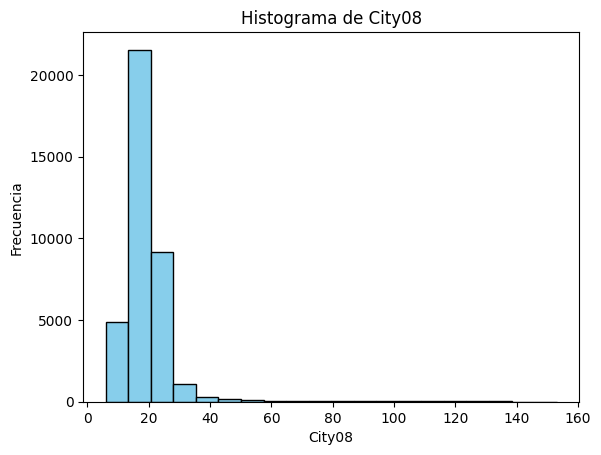

In [69]:
import matplotlib.pyplot as plt

plt.hist(eda_vfed['City08'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('City08')
plt.ylabel('Frecuencia')
plt.title('Histograma de City08')
plt.show()

Grafico de dispercion por city

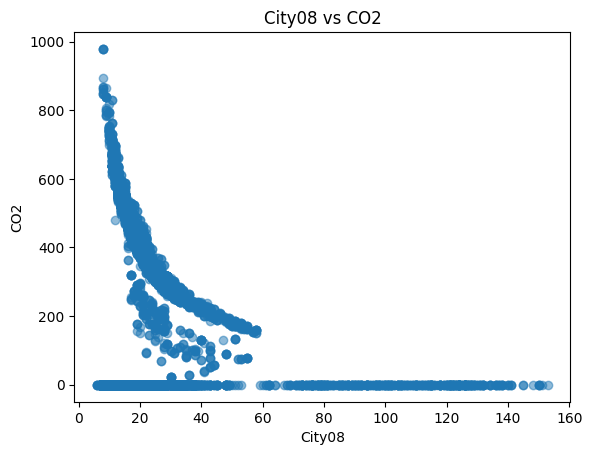

In [71]:
plt.scatter(eda_vfed['City08'], eda_vfed['CO2'], alpha=0.5)
plt.xlabel('City08')
plt.ylabel('CO2')
plt.title('City08 vs CO2')
plt.show()

Boxplot de CO2

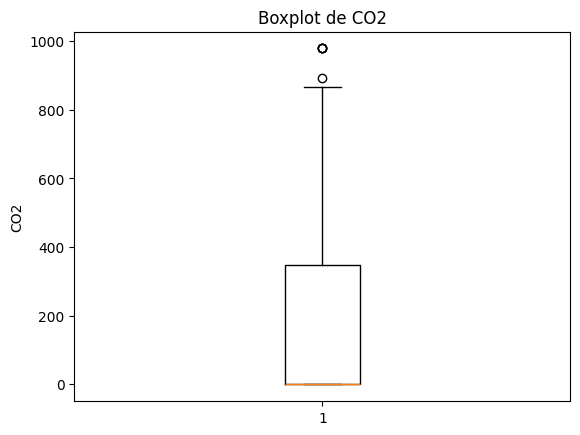

In [72]:
plt.boxplot(eda_vfed['CO2'])
plt.ylabel('CO2')
plt.title('Boxplot de CO2')
plt.show()

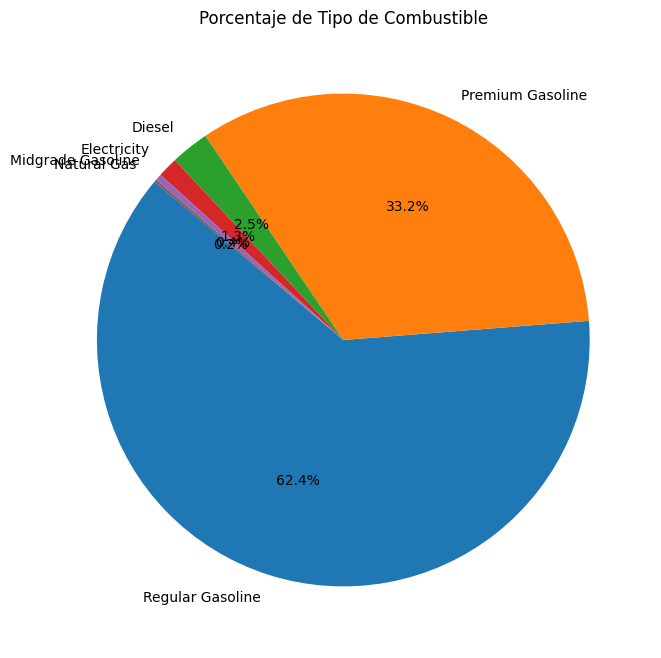

In [73]:
plt.figure(figsize=(8, 8))
eda_vfed['Tipo de Combustible'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Tipo de Combustible')
plt.ylabel('')
plt.show()

Aca se observa que lo el tipo de combustible que mas utilizaron fue la gasolina, por segundo lugar vemos que el premium gasolina tambien es la mas requerida en el mercado

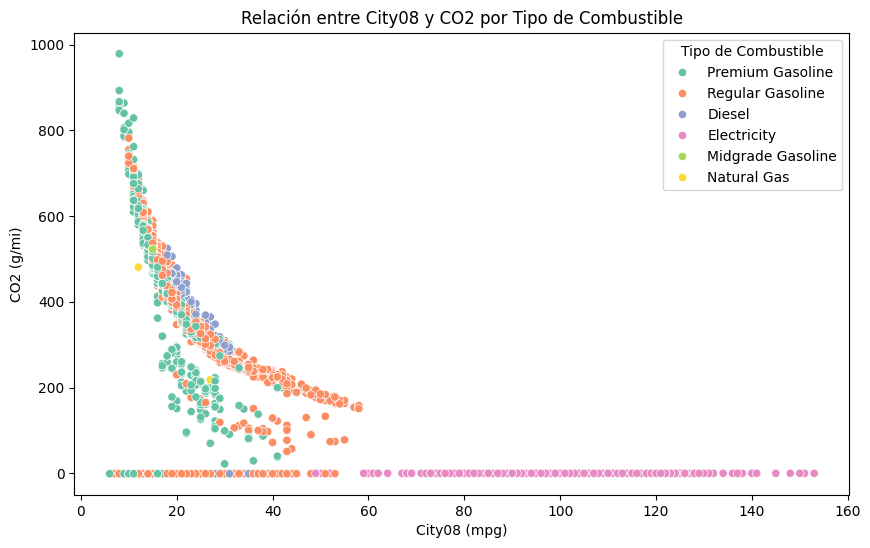

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='City08', y='CO2', data=eda_vfed, hue='Tipo de Combustible', palette='Set2')
plt.title('Relación entre City08 y CO2 por Tipo de Combustible')
plt.xlabel('City08 (mpg)')
plt.ylabel('CO2 (g/mi)')
plt.legend(title='Tipo de Combustible')
plt.show()